In [5]:
import requests
import time

if __name__ == '__main__':
    headers = {}
    keyvalue = {}
    url = 'http://data.stats.gov.cn/easyquery.htm'
    headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '\
                            'AppleWebKit/537.36 (KHTML, like Gecko) '\
                            'Chrome/70.0.3538.77 Safari/537.36'
                            
    keyvalue['m'] = 'QueryData'
    keyvalue['dbcode'] = 'hgnd'
    keyvalue['rowcode'] = 'zb'
    keyvalue['colcode'] = 'sj'
    keyvalue['wds'] = '[]'
    keyvalue['dfwds'] = '[{"wdcode":"zb","valuecode":"A0C02"},{"wdcode":"sj","valuecode":"2004-2017"}]'
    tim = int(round(time.time() * 1000))
    keyvalue['k1'] = str(tim)
    r = requests.get(url, headers=headers, params=keyvalue)
r = r.json()

In [6]:
w = {}
w_s = {}
w_u = {}
list = r['returndata']['datanodes']
for datanode in list:
    code = datanode['code']
    year = int(code.split('.')[-1])
    if 'A0C0201' in code:
        w[year] = datanode['data']['data']
    if 'A0C0202' in code:
        w_s[year] = datanode['data']['data']
    if 'A0C0203' in code:
        w_u[year] = datanode['data']['data']

In [7]:
w

{2017: 28761.2,
 2016: 32466.4,
 2015: 27962.6,
 2014: 27266.9,
 2013: 27957.8573804188,
 2012: 29528.7897250466,
 2011: 23256.7,
 2010: 30906.4063979384,
 2009: 24180.20107,
 2008: 27434.3,
 2007: 25255.1558,
 2006: 25330.1423466444,
 2005: 28053.1,
 2004: 24129.56}

In [8]:
import sqlite3
conn = sqlite3.connect('water_resource.db')
print("Opened database successfully")
c = conn.cursor()
c.execute('''CREATE TABLE W
       (ID INT PRIMARY KEY     NOT NULL,
       YEAR        TEXT    NOT NULL,
       AMOUNT        TEXT    NOT NULL);''')
print("Water Resource Table Created!")
c.execute('''CREATE TABLE WS
       (ID INT PRIMARY KEY     NOT NULL,
       YEAR        TEXT    NOT NULL,
       AMOUNT        TEXT    NOT NULL);''')
print("Surface Water Resource Table Created!")
c.execute('''CREATE TABLE WU
       (ID INT PRIMARY KEY     NOT NULL,
       YEAR        TEXT    NOT NULL,
       AMOUNT        TEXT    NOT NULL);''')
print("Underground Water Resource Table Created!")
conn.commit()
conn.close()

Opened database successfully
Water Resource Table Created!
Surface Water Resource Table Created!
Underground Water Resource Table Created!


In [11]:
# Insert data
conn = sqlite3.connect('water_resource.db')
c = conn.cursor()

# make sure you already have the dict CITIES in the memory
for i, k in enumerate(w):
    sql = "INSERT INTO W (ID,YEAR,AMOUNT) \
      VALUES (%d, %d, %d);" % (i, k, w[k])
    c.execute(sql)
    sql = "INSERT INTO WS (ID,YEAR,AMOUNT) \
      VALUES (%d, %d, %d);" % (i, k, w_s[k])
    c.execute(sql)
    sql = "INSERT INTO WU (ID,YEAR,AMOUNT) \
      VALUES (%d, %d, %d);" % (i, k, w_u[k])
    c.execute(sql)

conn.commit()
print("Records created successfully")
conn.close()

Records created successfully


In [1]:
import sqlite3
conn = sqlite3.connect('water_resource.db')
c = conn.cursor()
c.execute("select * from W;")
data = c.fetchall()
conn.commit()
conn.close()
year = []
w = []

for item in data:
    year.append(int(item[1]))
    w.append(int(item[2]))

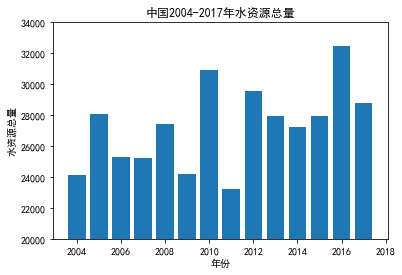

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import mpl 

mpl.rcParams['font.sans-serif'] = ['SimHei']
'''
plt.figure(figsize=[20, 6])
plt.ylim([120000,140000])
plt.bar(year, p, facecolor='#ff9800')
xtick = np.arange(1999,2019)
ytick = np.arange(120000, 140001, 2500)
plt.xticks(xtick, size=15)
plt.yticks(ytick, size=12)
plt.xlabel('年份', size=17)
plt.ylabel('人口数', size=15)
plt.title('中国1999-2008年年末总人口数', size=20)
plt.show()
'''
plt.bar(year, w)
plt.ylim([20000, 34000])
plt.xlabel('年份')
plt.ylabel('水资源总量')
plt.title('中国2004-2017年水资源总量')
plt.show()

In [4]:
conn = sqlite3.connect('water_resource.db')
c = conn.cursor()
c.execute("select * from WS;")
data1 = c.fetchall()
c.execute("select * from WU;")
data2 = c.fetchall()
conn.commit()
conn.close()
ws = []
wu = []

for i in range(len(data1)):
    ws.append(int(data1[i][2]))
    wu.append(int(data2[i][2]))

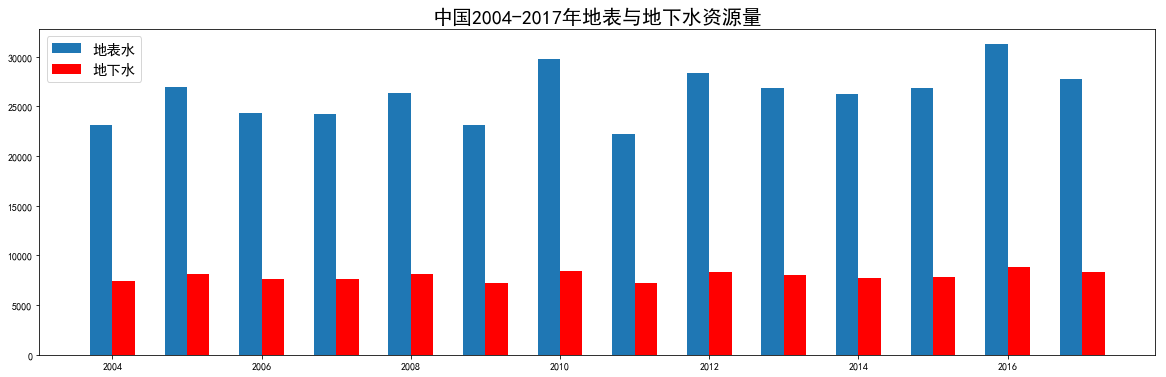

In [16]:
width = 0.5
plt.figure(figsize=[20, 6])
year = np.array(year)
index = np.arange(len(ws))
plt.bar(year-0.15, ws, width=0.3, label='地表水')
plt.bar(year+0.15, wu, width=0.3, color='r', label='地下水')
plt.title('中国2004-2017年地表与地下水资源量', size=20)
legend = plt.legend(loc='upper left',fontsize='x-large')
legend.get_title().set_fontsize(fontsize = 50)
plt.show()